In [1]:
# required imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_2928/3826133371.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# grab last 5 years of required data

# property assessment data, we want the land usage codes and parcel id numbers
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'LU']]
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'LU']]
pa_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'LU']]
pa_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'LU']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'LU']]

# sam data, we want the neighborhood and their parcel ids
neighborhoods = pd.read_csv('../data/sam.csv')[['PARCEL', 'MAILING_NEIGHBORHOOD']]

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_2928/2756478497.py:12: DtypeWarning: Columns (9,10,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  neighborhoods = pd.read_csv('../data/sam.csv')[['PARCEL', 'MAILING_NEIGHBORHOOD']]


In [3]:
# rename neighborhood data columns for ease of use
neighborhoods.rename(columns={'PARCEL': 'PID'}, inplace=True)
neighborhoods.rename(columns={'MAILING_NEIGHBORHOOD': 'NEIGHBORHOOD'}, inplace=True)

## Find Number of Residental Properties in each Neighborhood per Year

In [4]:
# grab properties with residental land usage
residental_codes = ['R1', 'R2', 'R3', 'R4', 'RC', 'A', 'CM']

residental_19_no_neighborhood = pa_2019[(pa_2019['LU'].isin(residental_codes))].dropna()
residental_20_no_neighborhood = pa_2020[(pa_2020['LU'].isin(residental_codes))].dropna()
residental_21_no_neighborhood = pa_2021[(pa_2021['LU'].isin(residental_codes))].dropna()
residental_22_no_neighborhood = pa_2022[(pa_2022['LU'].isin(residental_codes))].dropna()
residental_23_no_neighborhood = pa_2023[(pa_2023['LU'].isin(residental_codes))].dropna()
residental_24_no_neighborhood = pa_2024[(pa_2024['LU'].isin(residental_codes))].dropna()

In [5]:
# how many residental properties we have
print('Number of residental properties')
print('2019:', residental_19_no_neighborhood['PID'].count())
print('2020:', residental_20_no_neighborhood['PID'].count())
print('2021:', residental_21_no_neighborhood['PID'].count())
print('2022:', residental_22_no_neighborhood['PID'].count())
print('2023:', residental_23_no_neighborhood['PID'].count())
print('2024:', residental_24_no_neighborhood['PID'].count())

Number of residental properties
2019: 80265
2020: 79598
2021: 79592
2022: 79818
2023: 79957
2024: 79886


In [6]:
# update residental data frames to have neighborhood if we have it, if we dont, drop the row
# then using that new data frame, create another one grouped by neighborhood to get the number of residental properties per neighborhood for that year

neighborhoods_filtered = neighborhoods[neighborhoods['PID'].isin(residental_19_no_neighborhood['PID'])].drop_duplicates()
residental_19 = pd.merge(residental_19_no_neighborhood, neighborhoods_filtered, on='PID', how='outer').dropna()
neighborhood_num_residental_19 = residental_19.groupby('NEIGHBORHOOD').size().reset_index(name='2019')

neighborhoods_filtered = neighborhoods[neighborhoods['PID'].isin(residental_20_no_neighborhood['PID'])].drop_duplicates()
residental_20 = pd.merge(residental_20_no_neighborhood, neighborhoods_filtered, on='PID', how='outer').dropna()
neighborhood_num_residental_20 = residental_20.groupby('NEIGHBORHOOD').size().reset_index(name='2020')

neighborhoods_filtered = neighborhoods[neighborhoods['PID'].isin(residental_21_no_neighborhood['PID'])].drop_duplicates()
residental_21 = pd.merge(residental_21_no_neighborhood, neighborhoods_filtered, on='PID', how='outer').dropna()
neighborhood_num_residental_21 = residental_21.groupby('NEIGHBORHOOD').size().reset_index(name='2021')

neighborhoods_filtered = neighborhoods[neighborhoods['PID'].isin(residental_22_no_neighborhood['PID'])].drop_duplicates()
residental_22 = pd.merge(residental_22_no_neighborhood, neighborhoods_filtered, on='PID', how='outer').dropna()
neighborhood_num_residental_22 = residental_22.groupby('NEIGHBORHOOD').size().reset_index(name='2022')

neighborhoods_filtered = neighborhoods[neighborhoods['PID'].isin(residental_23_no_neighborhood['PID'])].drop_duplicates()
residental_23 = pd.merge(residental_23_no_neighborhood, neighborhoods_filtered, on='PID', how='outer').dropna()
neighborhood_num_residental_23 = residental_23.groupby('NEIGHBORHOOD').size().reset_index(name='2023')

neighborhoods_filtered = neighborhoods[neighborhoods['PID'].isin(residental_24_no_neighborhood['PID'])].drop_duplicates()
residental_24 = pd.merge(residental_24_no_neighborhood, neighborhoods_filtered, on='PID', how='outer').dropna()
neighborhood_num_residental_24 = residental_24.groupby('NEIGHBORHOOD').size().reset_index(name='2024')

In [7]:
# how many residental properties we know the neighborhood of
print('Number of residental properties we know the neighborhood of')
print('2019:', residental_19['PID'].count())
print('2020:', residental_20['PID'].count())
print('2021:', residental_21['PID'].count())
print('2022:', residental_22['PID'].count())
print('2023:', residental_23['PID'].count())
print('2024:', residental_24['PID'].count())

Number of residental properties we know the neighborhood of
2019: 53366
2020: 52771
2021: 52758
2022: 52823
2023: 52862
2024: 52736


In [24]:
# determine data loss from neighborhood data

print('Percentage of lost data per year')
print('2019:', residental_19['PID'].count() / residental_19_no_neighborhood['PID'].count() * 100, '%')
print('2020:', residental_20['PID'].count() / residental_20_no_neighborhood['PID'].count() * 100, '%')
print('2021:', residental_21['PID'].count() / residental_21_no_neighborhood['PID'].count() * 100, '%')
print('2022:', residental_22['PID'].count() / residental_22_no_neighborhood['PID'].count() * 100, '%')
print('2023:', residental_23['PID'].count() / residental_23_no_neighborhood['PID'].count() * 100, '%')
print('2024:', residental_24['PID'].count() / residental_24_no_neighborhood['PID'].count() * 100, '%')

Percentage of lost data per year
2019: 66.48726094810938 %
2020: 66.29689188170556 %
2021: 66.28555633732033 %
2022: 66.17930792553058 %
2023: 66.11303575671924 %
2024: 66.014070049821 %


In [8]:
# merge the grouped data together to get a single data frame of number of residental properties for a neighborhood per year
merged = pd.merge(neighborhood_num_residental_20, neighborhood_num_residental_21, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhood_num_residental_22, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhood_num_residental_23, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhood_num_residental_24, on = 'NEIGHBORHOOD', how='outer')
merged = merged.fillna(0)

# sort the neighborhoods by average number of properties
value_columns = merged.columns[1:]
merged['Average'] = merged[value_columns].mean(axis=1)
merged = merged.sort_values(by='Average', ascending=False)

neighborhood_num_residental_per_year = merged.drop(columns=['Average'])

Text(0.5, 0, 'Neighborhood')

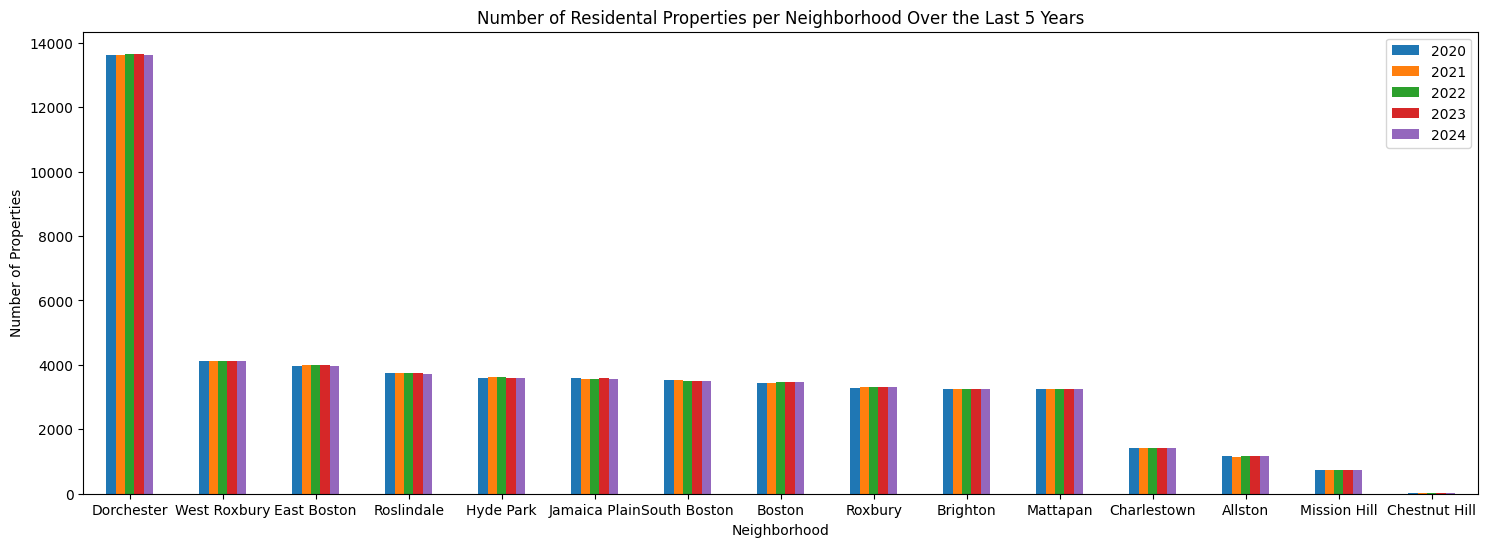

In [9]:
neighborhood_num_residental_per_year.plot(kind='bar', figsize=(18,6), x='NEIGHBORHOOD', rot=0)
plt.title('Number of Residental Properties per Neighborhood Over the Last 5 Years')
plt.ylabel('Number of Properties')
plt.xlabel('Neighborhood')

In [10]:
# split neighborhood_num_residental_per_year into each neighborhood so that we can use the values later

dorchester_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Dorchester'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
west_roxbury_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'West Roxbury'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
east_boston_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'East Boston'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
roslindale_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Roslindale'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
hyde_park_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Hyde Park'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
jamaica_plain_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Jamaica Plain'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
south_boston_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'South Boston'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
boston_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Boston'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
roxbury_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Roxbury'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
brighton_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Brighton'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
mattapan_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Mattapan'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
charlestown_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Charlestown'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
allston_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Allston'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
mission_hill_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Mission Hill'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])
chestnut_hill_num_residental_per_year = neighborhood_num_residental_per_year[neighborhood_num_residental_per_year['NEIGHBORHOOD'] == 'Chestnut Hill'].reset_index().drop(columns=['NEIGHBORHOOD', 'index'])

## Find how many Residental Properties have been Added per Year

In [11]:
# grab all multi family homes in 2020 that are not in 2019
units_added_20 = residental_20[(~(residental_20.PID.isin(residental_19.PID)))].dropna()

# then grab all multi family homes in 2021 that are not in 2020 or in 2019
units_added_21 = residental_21[(~(residental_21.PID.isin(units_added_20.PID) | residental_21.PID.isin(residental_19.PID)))].dropna()

# continue as before
units_added_22 = residental_22[(~(residental_22.PID.isin(units_added_21.PID) | residental_22.PID.isin(units_added_20.PID) | residental_22.PID.isin(residental_19.PID)))].dropna()

units_added_23 = residental_23[(~(residental_23.PID.isin(units_added_22.PID) | residental_23.PID.isin(units_added_21.PID) | residental_23.PID.isin(units_added_20.PID) | residental_23.PID.isin(residental_19.PID)))].dropna()

units_added_24 = residental_24[(~(residental_24.PID.isin(units_added_23.PID) | residental_24.PID.isin(units_added_22.PID) | residental_24.PID.isin(units_added_21.PID) | residental_24.PID.isin(units_added_20.PID) | residental_24.PID.isin(residental_19.PID)))].dropna()

# for each year, find the percentage increase of properties
unit_increase_data = {
    '2020': [units_added_20['PID'].count() / residental_20['PID'].count() * 100],
    '2021': [units_added_21['PID'].count() / residental_21['PID'].count() * 100],
    '2022': [units_added_22['PID'].count() / residental_22['PID'].count() * 100],
    '2023': [units_added_23['PID'].count() / residental_23['PID'].count() * 100],
    '2024': [units_added_24['PID'].count() / residental_24['PID'].count() * 100]
}

# number of residental units added per year
print('Number of residental units added that year')
print('2020:', units_added_20['PID'].count())
print('2021:', units_added_21['PID'].count())
print('2022:', units_added_22['PID'].count())
print('2023:', units_added_23['PID'].count())
print('2024:', units_added_24['PID'].count())

Number of residental units added that year
2020: 108
2021: 50
2022: 81
2023: 44
2024: 41


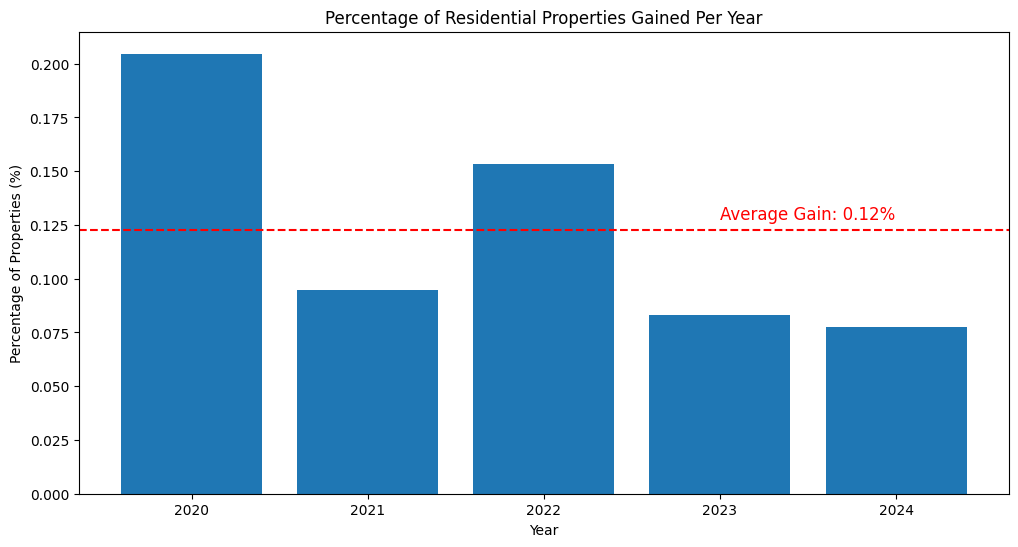

In [12]:
unit_increase_percentages = pd.DataFrame(unit_increase_data).transpose()
unit_increase_percentages.head()

plt.figure(figsize=(12, 6))
plt.bar(unit_increase_percentages.index, unit_increase_percentages.values.flatten())

avg = unit_increase_percentages.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_increase_percentages) - 2, avg + 0.005, f'Average Gain: {avg:.2f}%', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Properties (%)')
plt.title('Percentage of Residential Properties Gained Per Year')
plt.show()

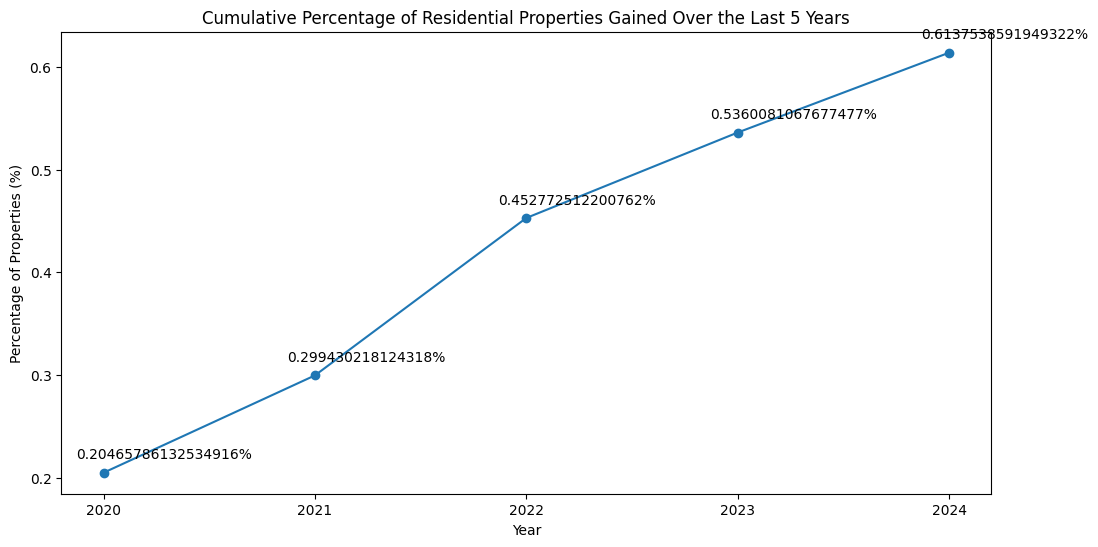

In [25]:
# Calculate the cumulative sum
cumulative_percentage = unit_increase_percentages.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_percentage.index, cumulative_percentage.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_percentage.index,cumulative_percentage.values.flatten()):
    plt.annotate(f'{y}%', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Properties (%)')
plt.title('Cumulative Percentage of Residential Properties Gained Over the Last 5 Years')
plt.show()

In [14]:
# for all the units added, sort them into their neighborhoods

neighborhoods_added_20 = units_added_20.groupby('NEIGHBORHOOD').size().reset_index(name='2020')
neighborhoods_added_21 = units_added_21.groupby('NEIGHBORHOOD').size().reset_index(name='2021')
neighborhoods_added_22 = units_added_22.groupby('NEIGHBORHOOD').size().reset_index(name='2022')
neighborhoods_added_23 = units_added_23.groupby('NEIGHBORHOOD').size().reset_index(name='2023')
neighborhoods_added_24 = units_added_24.groupby('NEIGHBORHOOD').size().reset_index(name='2024')

Text(0.5, 0, 'Neighborhood')

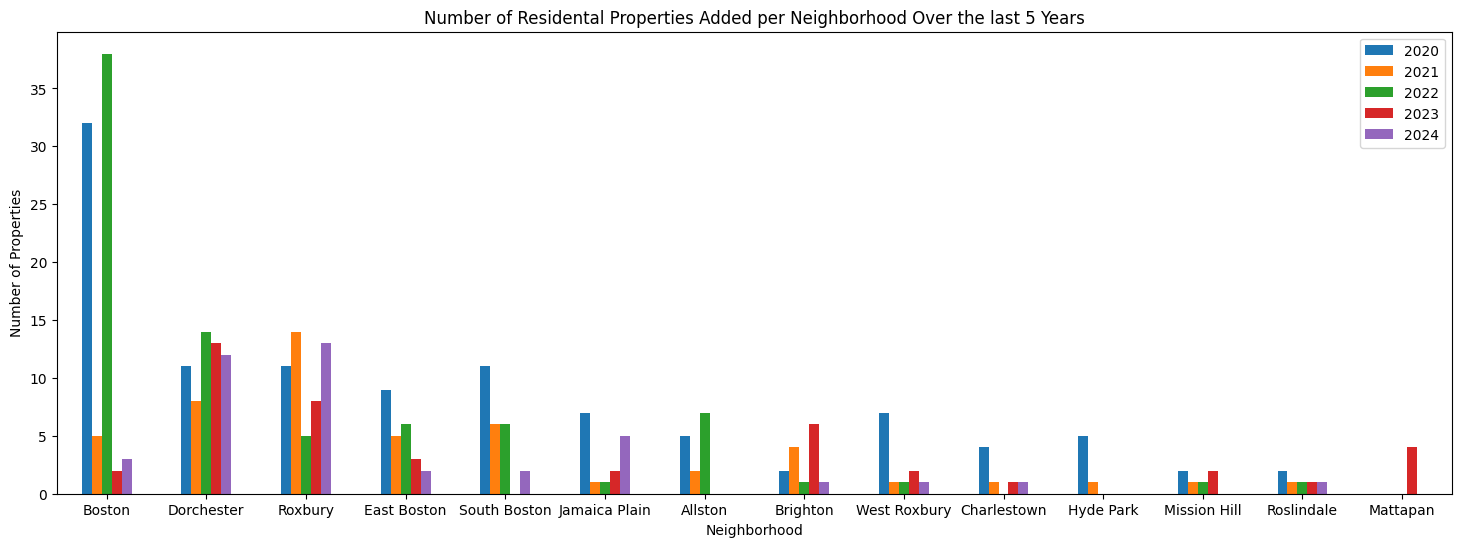

In [15]:
merged = pd.merge(neighborhoods_added_20, neighborhoods_added_21, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhoods_added_22, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhoods_added_23, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhoods_added_24, on = 'NEIGHBORHOOD', how='outer')
merged = merged.fillna(0)

value_columns = merged.columns[1:]
merged['Average'] = merged[value_columns].mean(axis=1)
merged = merged.sort_values(by='Average', ascending=False)

neighborhood_num_gained_per_year = merged.drop(columns=['Average'])

neighborhood_num_gained_per_year.plot(kind='bar', figsize=(18,6), x='NEIGHBORHOOD', rot=0)
plt.title('Number of Residental Properties Added per Neighborhood Over the last 5 Years')
plt.ylabel('Number of Properties')
plt.xlabel('Neighborhood')

## Find how many residental units have been lost per year

In [16]:
# grab all multi family homes in 2004

# grab all the multi family homes in 2004 that are not in 2005
units_lost_20 = residental_19[~residental_19.PID.isin(residental_20.PID)]

# grab all the multi family homes in 2005 that are not in 2006
units_lost_21 = residental_20[~residental_20.PID.isin(residental_21.PID)]

# continue
units_lost_22 = residental_21[~residental_21.PID.isin(residental_22.PID)]

units_lost_23 = residental_22[~residental_22.PID.isin(residental_23.PID)]

units_lost_24 = residental_23[~residental_23.PID.isin(residental_24.PID)]

# for each year, count the number of rows
unit_decrease_data = {
    '2020': [units_lost_20['PID'].count() / residental_20['PID'].count() * 100],
    '2021': [units_lost_21['PID'].count() / residental_21['PID'].count() * 100],
    '2022': [units_lost_22['PID'].count() / residental_22['PID'].count() * 100],
    '2023': [units_lost_23['PID'].count() / residental_23['PID'].count() * 100],
    '2024': [units_lost_24['PID'].count() / residental_24['PID'].count() * 100]
}

# number of units per year
print('Number of residental units lost that year')
print('20:', units_lost_20['PID'].count())
print('21:', units_lost_21['PID'].count())
print('22:', units_lost_22['PID'].count())
print('23:', units_lost_23['PID'].count())
print('24:', units_lost_24['PID'].count())


Number of residental units lost that year
20: 20
21: 16
22: 21
23: 20
24: 53


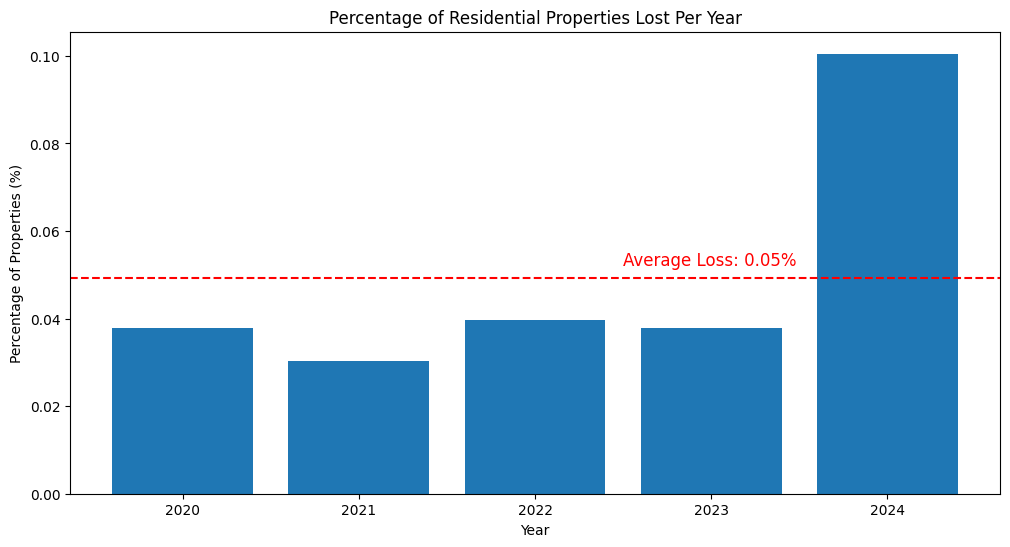

In [17]:
unit_decrease_percentage = pd.DataFrame(unit_decrease_data).transpose()

plt.figure(figsize=(12, 6))
plt.bar(unit_decrease_percentage.index, unit_decrease_percentage.values.flatten())

# add avg
avg = unit_decrease_percentage.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_decrease_percentage) - 2.5, avg + 0.003, f'Average Loss: {avg:.2f}%', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Properties (%)')
plt.title('Percentage of Residential Properties Lost Per Year')
plt.show()

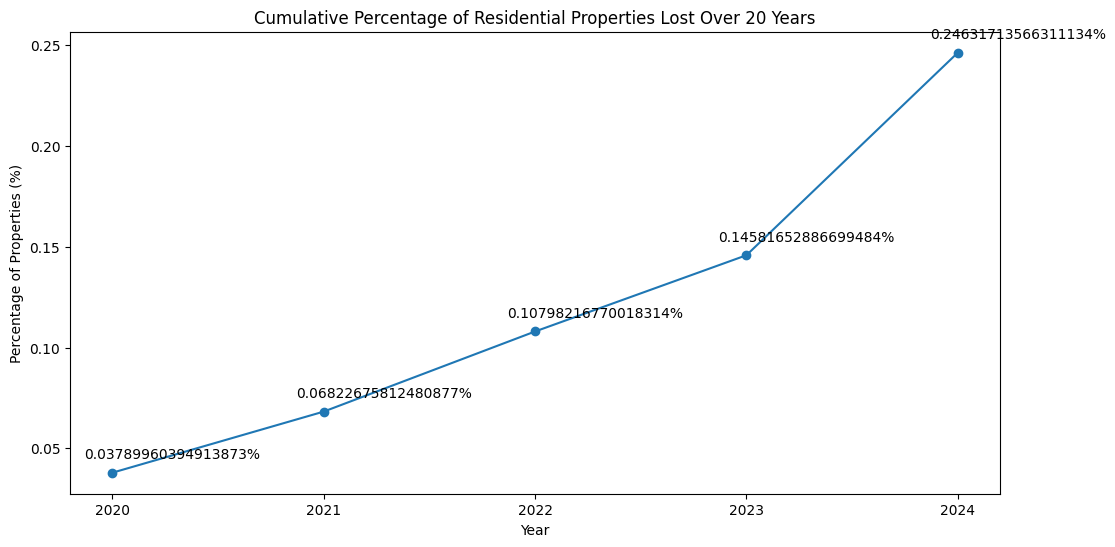

In [26]:
# Calculate the cumulative sum
cumulative_units = unit_decrease_percentage.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_units.index, cumulative_units.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_units.index,cumulative_units.values.flatten()):
    plt.annotate(f'{y}%', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Properties (%)')
plt.title('Cumulative Percentage of Residential Properties Lost Over 20 Years')
plt.show()

In [19]:
neighborhoods_lost_20 = units_lost_20.groupby('NEIGHBORHOOD').size().reset_index(name='2020')
neighborhoods_lost_21 = units_lost_21.groupby('NEIGHBORHOOD').size().reset_index(name='2021')
neighborhoods_lost_22 = units_lost_22.groupby('NEIGHBORHOOD').size().reset_index(name='2022')
neighborhoods_lost_23 = units_lost_23.groupby('NEIGHBORHOOD').size().reset_index(name='2023')
neighborhoods_lost_24 = units_lost_24.groupby('NEIGHBORHOOD').size().reset_index(name='2024')

Text(0.5, 0, 'Neighborhood')

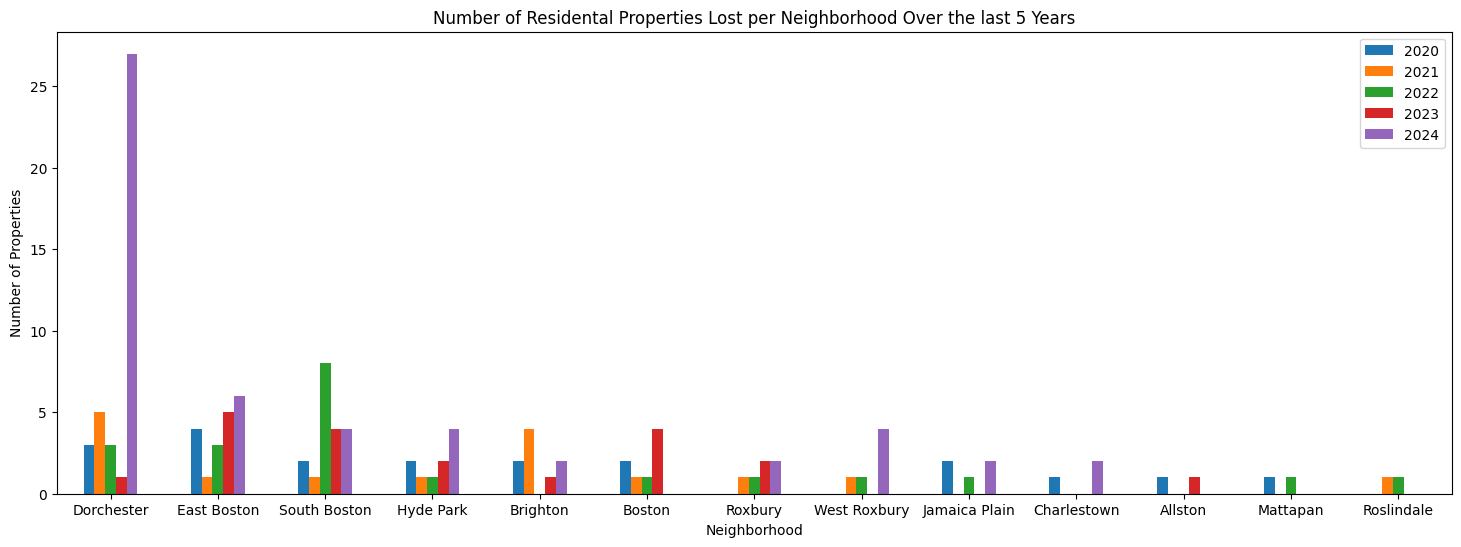

In [20]:
merged = pd.merge(neighborhoods_lost_20, neighborhoods_lost_21, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhoods_lost_22, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhoods_lost_23, on = 'NEIGHBORHOOD', how='outer')
merged = pd.merge(merged, neighborhoods_lost_24, on = 'NEIGHBORHOOD', how='outer')
merged = merged.fillna(0)

value_columns = merged.columns[1:]
merged['Average'] = merged[value_columns].mean(axis=1)
merged = merged.sort_values(by='Average', ascending=False)

neighborhood_num_lost_per_year = merged.drop(columns=['Average'])

neighborhood_num_lost_per_year.plot(kind='bar', figsize=(18,6), x='NEIGHBORHOOD', rot=0)
plt.title('Number of Residental Properties Lost per Neighborhood Over the last 5 Years')
plt.ylabel('Number of Properties')
plt.xlabel('Neighborhood')

## Combine findings of how many residental units have been added and lost to find if there has been a net gain or a net loss

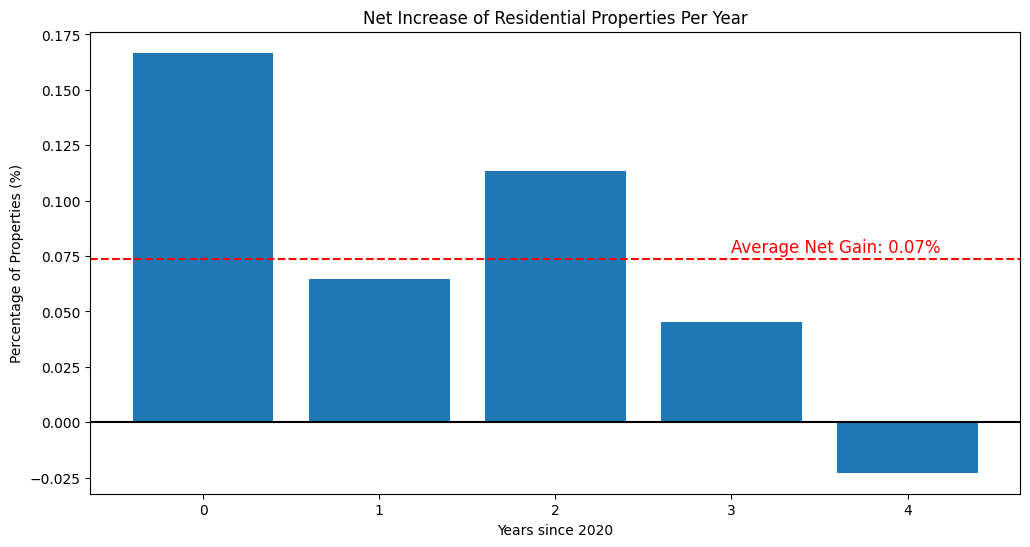

In [21]:
unit_net_increase_percentage =  pd.DataFrame(unit_increase_percentages.values - unit_decrease_percentage.values)

plt.figure(figsize=(12, 6))
plt.bar(unit_net_increase_percentage.index, unit_net_increase_percentage.values.flatten())
plt.axhline(y=0, color='k')

# add avg
avg = unit_net_increase_percentage.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_net_increase_percentage) - 2, avg + 0.003, f'Average Net Gain: {avg:.2f}%', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Years since 2020')
plt.xticks(unit_net_increase_percentage.index)
plt.ylabel('Percentage of Properties (%)')
plt.title('Net Increase of Residential Properties Per Year')
plt.show()

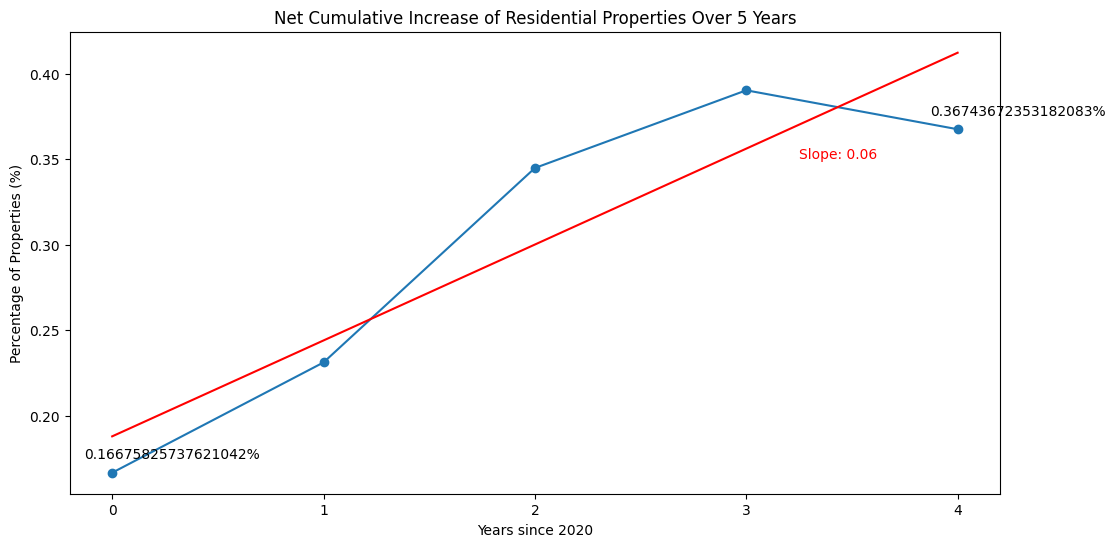

In [27]:
net_cumulative_units = unit_net_increase_percentage.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(net_cumulative_units.index, net_cumulative_units.values.flatten(), marker='o', linestyle='-')

slope, intercept, r_value, p_value, std_err = linregress(net_cumulative_units.index, net_cumulative_units.values.flatten())
# Plot best fit line
plt.plot(net_cumulative_units.index, slope*net_cumulative_units.index + intercept, color='red', label=f'Best Fit Line (Slope: {slope:.2f})')
# Print slope on the graph
plt.text(3.25, max(net_cumulative_units.values.flatten()) - 0.04, f'Slope: {slope:.2f}', fontsize=10, color='red')

plt.annotate(f'{net_cumulative_units.values.flatten()[0]}%', xy=(net_cumulative_units.index[0], net_cumulative_units.values.flatten()[0]), xytext=(-20, 10), textcoords='offset points')
plt.annotate(f'{net_cumulative_units.values.flatten()[-1]}%', xy=(net_cumulative_units.index[-1], net_cumulative_units.values.flatten()[-1]), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Years since 2020')
plt.xticks(unit_net_increase_percentage.index)
plt.ylabel('Percentage of Properties (%)')
plt.title('Net Cumulative Increase of Residential Properties Over 5 Years')
plt.show()

# i should create another bar chart that is percentage of properties lost or added per neighborhood instead of count bc some neighborhoods are bigger than others, there should also be two versions, one that is one percentage for all 5 years for a given neighborhood and one that breaks it down by year